#Code for CIS7031, Dr Ambikesh Jayal, ajayal@cardiffmet.ac.uk

In [1]:
#COMMON IMPORTS

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_norm = norm.transform(X)
    X_norm = pd.DataFrame(X_norm, columns=X.columns.values)

    X_norm;
    return X_norm;

In [36]:
from numpy import asarray
from sklearn.datasets import make_regression

from keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
    
def get_nn_model_function1(n_inputs, n_outputs):
    nn_model = Sequential()

    nn_model.add(layers.Dense(50, activation='relu'))
    nn_model.add(layers.Dense(100, activation='relu'))
    nn_model.add(layers.Dense(50, activation='relu'))
    nn_model.add(layers.Dense(1))

    #nn_model.compile(loss='mean_squared_error', optimizer='adam')
    nn_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return nn_model

# get the model
def get_nn_model_function2(n_inputs=5, n_outputs=1):
    network = Sequential()
    #network.add(layers.Dense(8, input_shape=(n_inputs,), activation='relu'))
    #network.add(layers.Dense(8, input_shape=(n_inputs,), kernel_initializer='he_uniform', activation='relu'))
    network.add(layers.Dense(n_inputs, input_shape=(n_inputs,), kernel_initializer='normal', activation='relu'))
    
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(6, activation='relu'))
    network.add(layers.Dense(4, activation='relu'))
    network.add(layers.Dense(n_outputs, activation='relu'))

    network.compile(loss='mse', optimizer='adam', metrics=['mse'])
    #network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return network

def get_nn_simplemodel(n_inputs=5, n_outputs=1):
    # create model
    model = Sequential()
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(2000, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_nn_simplemodel(n_inputs=5, n_outputs=1, optimizerinput='adam'):
    # create model
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(2000, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizerinput)
    return model

def get_nn_simplemodelWithBatchNormalizationAndDropout(n_inputs=5, n_outputs=1):
    # create model
    model = Sequential()
    #model.add(layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    #layers.Dropout(0.3)
    #layers.BatchNormalization()
    
    layers.Dropout(0.3)
    layers.BatchNormalization()
    model.add(layers.Dense(2000, activation='relu'))
    
    layers.Dropout(0.3)
    layers.BatchNormalization()
    model.add(layers.Dense(1))
    #model.add(layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [37]:
#function to return data as X, Y

def getDataBoston():
    # load dataset
    #df = read_csv("boston_housing.csv", delim_whitespace=True, header=None)
    
    df = pd.read_csv("BostonHousingData/boston_housing_csv.csv")
    
    #DATA CLEANING STEP
    # dropna drops missing values (think of na as "not available")
    df = df.dropna(axis=0)
   
    #Select only numeric columns
    df_onlyNumeric=df.select_dtypes(include=np.number)
    
    df=df_onlyNumeric
    
    #dataset = df.values
    X = df.iloc[:, 0:13]
    y=df.iloc[:, 13:14]

    return X,y,df

def getDataMelbourneHousing():
    # save filepath to variable for easier access
    #melbourne_file_path = 'melbourne-housing-snapshot/melb_data.csv'
    melbourne_file_path = 'melbourneHousingSnapshot/melb_data.csv'
    # read the data and store data in DataFrame titled melbourne_data
    melbourne_data = pd.read_csv(melbourne_file_path) 
  
    #DATA CLEANING STEP
    # dropna drops missing values (think of na as "not available")
    melbourne_data_clean = melbourne_data.dropna(axis=0)
    
    #Write cleaned data to xlsx file
    timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
    melbourne_data_clean.to_excel("melb_data_removed_na_"+timeStr+".xlsx", sheet_name='Sheet_name_1')
    
    #Select only numeric columns
    df_onlyNumeric=melbourne_data_clean.select_dtypes(include=np.number)

    df=df_onlyNumeric;
    y = df.Price
    
    #melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
    #melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude','Car']
    melbourne_features = ['Rooms', 'Distance','Bedroom2','Bathroom','BuildingArea','YearBuilt','Landsize', 'Lattitude','Car']
    X = df[melbourne_features]
    return X,y,df


In [38]:
#This function returns X,y,dataframe
def getData():
    #return getDataMelbourneHousing();
    return getDataBoston();

In [39]:
#Test getData function

X,y,df=getData();

#print(X.head())
#print(y.head())
print(df.head())

#print(X.describe())
#print(y.describe())
#print(df.describe())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff361c1ff50>]],
      dtype=object)

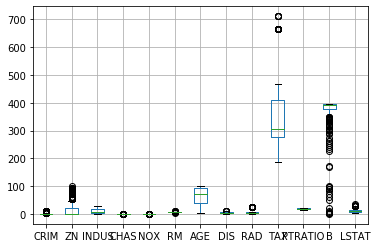

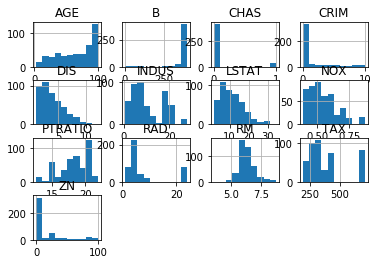

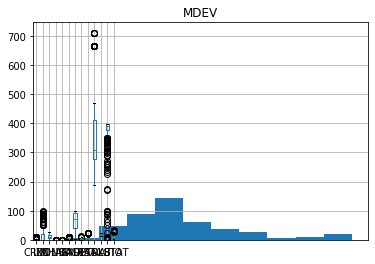

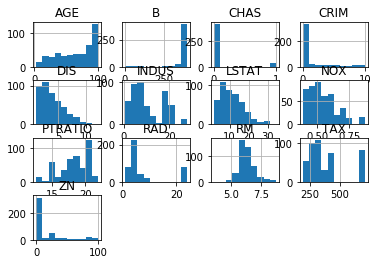

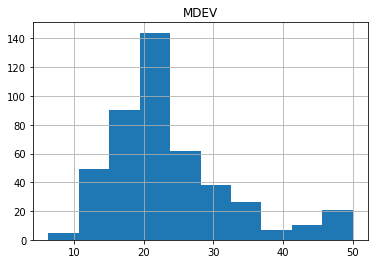

In [40]:
#Data Exploration

X,y,df=getData();

#df.boxplot()
#df.hist()

#Before normalization
X.boxplot()
X.hist()


y.boxplot()
y.hist()

#X=getNormalizedData(X)
#y=getNormalizedData(y)

#After normalization
X.boxplot()
X.hist()


y.boxplot()
y.hist()


In [41]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#Three datasets

#X_train, y_train
#X_val, y_val
#X_test, y_test

In [50]:
#Hyperparameter Tuning to Tune Batch Size and Number of Epochs

from sklearn.model_selection import GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, verbose=0)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)
# summarize results

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff3615ca310>,
             iid='warn', n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best: -76.376034 using {'batch_size': 60, 'epochs': 50}
-79.913420 (47.093336) with: {'batch_size': 10, 'epochs': 10}
-113.284734 (94.808957) with: {'batch_size': 10, 'epochs': 50}
-201.991562 (199.140538) with: {'batch_size': 10, 'epochs': 100}
-85.569228 (46.222346) with: {'batch_size': 20, 'epochs': 10}
-144.557221 (134.471879) with: {'batch_size': 20, 'epochs': 50}
-188.447577 (192.669050) with: {'batch_size': 20, 'epochs': 100}
-89.259713 (31.209986) with: {'batch_size': 40, 'epochs': 10}
-80.716705 (56.039620) with: {'batch_size': 40, 'epochs': 50}
-125.942343 (129.289459) w

In [43]:
y.shape
X.shape

(452, 13)

In [44]:
#Hyperparameter Tuning to Tune Optimization Algorithm

from sklearn.model_selection import GridSearchCV

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), epochs=100, batch_size=50, n_outputs=1, verbose=0)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -89.298400 using {'optimizerinput': 'Adam'}
-167.497363 (161.407805) with: {'optimizerinput': 'RMSprop'}
-122.174859 (44.748429) with: {'optimizerinput': 'Adagrad'}
-366.700438 (224.878560) with: {'optimizerinput': 'Adadelta'}
-89.298400 (53.663439) with: {'optimizerinput': 'Adam'}
-107.343674 (44.807164) with: {'optimizerinput': 'Adamax'}
-258.398307 (163.029339) with: {'optimizerinput': 'Nadam'}


In [45]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [46]:
#Get error using cross validation

# evaluate model
estimator = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, epochs=100, batch_size=5, verbose=0)
#estimator = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, epochs=100, batch_size=20, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -27.78 (22.28) MSE


In [47]:
# Code to explore OVERFITTING
# Explore train vs validation error for different epochs

network=get_nn_simplemodel(len(X.columns),1);
history = network.fit(X_train, y_train, verbose=1, epochs=50, batch_size=60, validation_data=(X_val, y_val))
#history = network.fit(X_train, y_train, verbose=0, epochs=500, batch_size=20, validation_data=(X_val, y_val))
#history = network.fit(X_train, y_train, verbose=0, epochs=1000, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/50
5/5 [==============================] - 1s 177ms/step - loss: 404.8303 - val_loss: 192.9211
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 181.8519 - val_loss: 94.3165
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 81.3028 - val_loss: 96.8618
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 102.5215 - val_loss: 78.8597
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 61.2734 - val_loss: 74.6638
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 72.7572 - val_loss: 72.8316
Epoch 7/50
5/5 [==============================] - 0s 31ms/step - loss: 62.4998 - val_loss: 67.3536
Epoch 8/50
5/5 [==============================] - 0s 31ms/step - loss: 62.1439 - val_loss: 66.2539
Epoch 9/50
5/5 [==============================] - 0s 52ms/step - loss: 57.0994 - val_loss: 66.2970
Epoch 10/50
5/5 [==============================] - 0s 29ms/step - loss: 60.5755 - val_loss: 66.1090
Epoc

   loss_train    loss_val  diff_in_loss
0  271.182343  192.921112     78.261230
1  171.217834   94.316521     76.901314
2   76.204498   96.861816     20.657318
3   93.993446   78.859665     15.133781
4   67.748703   74.663780      6.915077
5   70.518829   72.831619      2.312790
6   64.997871   67.353622      2.355751
7   63.634670   66.253876      2.619205
8   60.639603   66.296974      5.657372
9   60.374138   66.108955      5.734818


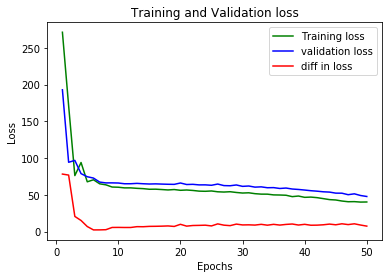

In [48]:
# Code to create graph for train vs validation error for different epochs

loss_train = history.history['loss']
loss_val = history.history['val_loss']

diff_in_loss=abs(np.subtract(loss_val,loss_train));

df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'train_vs_Validation_loss_'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)
plt.savefig(fileName+'.jpg',format='jpg', dpi=2000)

df.to_excel("neural_network_train_vs_val_loss"+timeStr+".xlsx", sheet_name='TrainvsValLoss')

plt.show()

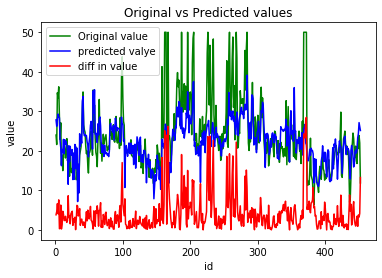

In [49]:
#code to print actual, predicted, diff in values

predicted=network.predict(X);
actual=y;

y_flat=actual.values.flatten();

predicted_flat=predicted.flatten()

residue=abs(np.subtract(y_flat,predicted_flat))

#Plot
xasix = range(1,len(y_flat)+1)

plt.plot(xasix, y_flat, 'g', label='Original value')
plt.plot(xasix, predicted_flat, 'b', label='predicted valye')
plt.plot(xasix, residue, 'r', label='diff in value')

plt.title('Original vs Predicted values')
plt.xlabel('id')
plt.ylabel('value')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'Original_vs_Predicted_y'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)
plt.savefig(fileName+'.jpg',format='jpg', dpi=2000)

plt.show()

#Write to file
df = pd.DataFrame({'y1':y_flat, 'pred':predicted_flat, 'residue':residue})

df.to_excel("neural_network_output"+timeStr+".xlsx", sheet_name='Sheet_name_1')

#Data frame to include all X,y, predicted y and difference between actual y and predicted y
masterdf = X.merge(df,left_index=True, right_index=True)
masterdf.to_excel("master_analysis_"+timeStr+".xlsx", sheet_name='Sheet_name_1')

In [ ]:
Eval_Metrics = [Accuracy, ]
Metric_Names = [‘Accuracy’, ‘Precision’, ‘Recall’, ‘F1 Score’]
Metrics_pos = np.arange(len(Metric_Names))
plt.bar(Metrics_pos, Eval_Metrics)
plt.xticks(Metrics_pos, Metric_Names)
plt.title(‘Accuracy v Precision v Recall v F1 Score of the ANN model’)
plt.show()